## Exercise 5.1: Bias-Variance Analysis

In this exercise we explore the bias and variance for different model classes given the simple target function $f(x) = \sin \pi x$. The model classes to investigate are:
  * Constant models: $h(x) = b$
  * Linear models: $h(x) = w x + b$
  * Polynomial models: $h(x) = w_d x^d + \ldots w_2 x^2 + w_1 x + b $
  
You already know how to fit linear models. Polynomial models can be trained the same way if the dataset is augmented with the polynomial features first. Scikit-learn already offers a [convenient function](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures) to do this for you, but you are welcome to build your own solution for this.

Solutions for linear problem

formula for linear regression
\begin{equation}
\hat{\boldsymbol w} = (\mathbf{X}^{\rm T}\mathbf{X})^{-1} \mathbf{X}^{\rm T}\mathbf{y}
\end{equation}

**Task a): Model fitting.**
Fill in the functions below for augmenting datasets as well as fitting and evaluating the models to be investigated. Make sure to understand the dimensionality of input and output of each function.

In [11]:
import numpy as np
import pdb as pdb

# We will use polynomials of degree 3 in this exercise
poly_degree = 3
# Shape guidelines
# X: (samples, features)
# y: (samples, targets)
# weights: (features, targets)

# A helper function to make sure that we fit and evaluate matrices of
# correct sizes. Remember that the first dimension always indicates
# the samples and the second the features or targets.
# Not all of these constraints are strictly necessary, but they will make
# your life easier when things go wrong.
def verify_shapes(X=None, y=None):
    if X is not None:
        assert X.ndim == 2 and X.shape[1] == 1
    if y is not None:
        assert y.ndim == 2 and y.shape[1] == 1
        if X is not None:
            assert y.shape[0] == X.shape[0]


# The ground-truth that we want to approximate.
# We only care about the domain [-1, 1], so no further preprocessing is required.
def target(X):
    verify_shapes(X)
    return np.sin(np.pi * X)


# Fit a constant model h(x) = b.
# Fitting only a bias reduces to the mean over the targets.
# Remember to keep the correct shape!
def fit_constant(X, y):
    verify_shapes(X, y)
    bias = np.mean(y)
    weights = np.array([[bias]])  # return 1:1 array, containing only bias
    return weights
    
# Evaluate a constant model defined by its bias b.
# return array of y_values for given X_values, shape according to shape of b (higher dim, if b array over all datasets)
def eval_constant(X, b):
    verify_shapes(X)
    # y_return = np.ones(X.shape[0])*b  # my version, works only for b being scalar
    y_return = np.repeat(b, X.shape[0], axis=0)    # alternative from "solutions", b can be either scalar or array / matrix
    return y_return

# Add a bias "feature" to the data to get
# the augmented representation needed for numpy functions 
def add_bias(X):
    bias_column = np.ones((X.shape[0], 1)) 
    X_aug = np.hstack([bias_column, X])
    return X_aug

# Fit a linear model h(x) = wx + b.
# You can use the Moore-penrose pseudoinverse or the 
# least squares function in numpy.linalg.
# Remember to augment the dataset to include a column for the bias.
def fit_linear(X, y):
    verify_shapes(X, y)
    X_aug = add_bias(X)
    weights = np.dot(np.linalg.inv(np.dot(X_aug.T,X_aug)),np.dot(X_aug.T,y))
    #print("weights classic", weights)
  
    # The pseudo-inverse of a matrix A, denoted A^+, is defined as: 
    # “the matrix that ‘solves’ [the least-squares problem] Ax = b,” i.e., 
    # if \bar{x} is said solution, then A^+ is that matrix such that \bar{x} = A^+b.
    # Moore-Penrose solution
    # https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html
    #weights = np.linalg.pinv(X_aug).dot(y)
    #print("weights penrose", weights)
    
    # Least squares solution
    #weights = np.linalg.lstsq(X_aug, y)[0]
    #print("weights lstsq", weights)
    
    return weights


# Evaluate a linear model defined by its weights w. Remember to augment X!
# np. dot() For 2-D arrays it is equivalent to matrix multiplication, and for 1-D arrays to inner product of vectors 
# (without complex conjugation). 
# For N dimensions it is a sum product over the last axis of a and the second-to-last of b:
def eval_linear(X, w): # shape w (2,1) für average berechnung, für variance (1, 2, 10) (ein Satz je dataset, bei Aufruf linear_models transposed)
    verify_shapes(X)
    X_aug = add_bias(X)    # shape X_aug (200, 2)
    #print("x_aug",X_aug.shape)
    #print("w",w.shape)
    y_return = X_aug.dot(w)     # (200, 1) oder (200, 1, 10)
    #print("y_return X_aug.dot(w)",y_return.shape)
    return y_return

# Fit a polynomial model of degree 'poly_degree'.
# Augment the dataset with polynomial features
# and fit a linear model to it.

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=poly_degree, include_bias=True)
add_polynomials = poly_features.fit_transform

# Fit a polynomial model of degree 'poly_degree'.
# Augment the dataset with polynomial features and fit a linear model to it.
# könnte man auch selber schreiben: just add columns with a^2, a^3, b^2*a etc. alle gemischten features 
# - also als Basis functions
# optimale Anpassungen der koeffizienten = weights passiert automatisch durch linearen algorithmus, genau wie im linearen Fall 

def fit_polynomial(X, y):
    verify_shapes(X, y)
    # print("X \n", X)
    X_aug = add_polynomials(X)   # fügt spalte 0 mit 1-sen dazu, plus spalte 2 und 3 mit quadrat und hoch3 
    # print("X_aug with polynomials \n", X_aug)
    
    # exactly the same as for normal linear regression - Basis functions Phi are represented by X_aug
    weights = np.linalg.pinv(X_aug).dot(y)
    
    return weights

# Evaluate a polynomial model defined by its weights w.
# zu gegebenen x Werten werden die polynome ausgerechnet und als Spalten dazuaddiert, dann mit den weights ausgerechnet
def eval_polynomial(X, w):
    verify_shapes(X)

    X_aug = add_polynomials(X)
    y_return = X_aug.dot(w)

    return y_return

Now that we can fit and evaluate these functions, we should create the datasets to evaluate the bias and variance of each model class. Since the bias-variance decomposition is defined as an expectation, we need to create sufficiently many datasets to get a good estimate.

---

** Task b): Model analysis.** Fit 100 models of each class to 100 datasets with only 5 samples each. Determine the average models and calculate the bias and variance of each class.

**Hint**: Remember the sample mean for the integrals: $\mathbb{E}[x] = \int x \ p(x) \ dx \approx \frac{1}{N} \sum_i^N x_i$

We provide you with plotting code for the visualization of the fitted and the average models below the code stub.

In [12]:
n_datasets = 100
n_samples = 5

# Bookkeeping
# We can store all the samples efficiently by using a 3d-array,(with X 1-dimensional)
X_all = np.zeros((n_datasets, n_samples, 1))
y_all = np.zeros((n_datasets, n_samples, 1))

# We also need to keep track of every model - set of weights for each model (one generated for each dataset)
constant_models = np.zeros((n_datasets, 1, 1))  # one weight (=mean)
linear_models = np.zeros((n_datasets, 2, 1))    # two weights (=mean and w1)
polynomial_models = np.zeros((n_datasets, poly_degree + 1, 1))  # w1,w2,w3 + bias

# Sample the datasets uniformly for x in [-1, 1] and fit the models
# with the previously defined functions.
for i in range(n_datasets):
    for j in range(n_samples):
        #X_all[i][j][0] = np.linspace(-1, 1, n_samples)[j]
        # random über x verteilt, aber nach fester y function (keine Gauss-Verteilung)
        # uniform distribution between -1 and 1
        X_all[i] = np.random.uniform(-1, 1, size=(n_samples, 1))
        #y_all[i][j][0] = target(X_all[i])[j][0]
    y_all[i] = target(X_all[i])
    
    #print("constant_models",fit_constant(X_all[i], y_all[i]))
    constant_models[i]   = fit_constant(X_all[i], y_all[i])
    linear_models[i]     = fit_linear(X_all[i], y_all[i])
    polynomial_models[i] = fit_polynomial(X_all[i], y_all[i])
    
#print("constant_models",constant_models)
#print("linear_models",linear_models)
#print("poly_models",polynomial_models)
#print("X_all",X_all)
#print("y_all",y_all)

# Determine the average model for each class by
# averaging over the first axis (=rows)
average_constant_model = np.mean(constant_models,axis=0)
average_linear_model = np.mean(linear_models,axis=0)
average_polynomial_model = np.mean(polynomial_models,axis=0)

# In order to evaluate the models over the ground truth, we form
# a linearly spaced grid in the target domain with corresponding "true" y_values (ground truth)
X_eval = np.linspace(-1, 1, 200).reshape((-1, 1))   # test grid for functions
y_eval = target(X_eval)                             # y_values of test grid ground truth
# print("X_eval",X_eval)
# Calculate the bias and variance for each class with X_eval and y_eval


# generate modeled y values over eval grid using constant model
#y_avg_constant_model = eval_constant(X_eval,average_constant_model[0][0])

# evaluate model for each dataset 
model_evals = eval_constant(X_eval, constant_models.T)        # input to eval_constant() array over all datasets
#print("model_evals \n",model_evals)
average_eval = eval_constant(X_eval, average_constant_model)  # input to eval_constant() average over all datasets
#print("avg_eval \n",average_eval)

# bias^2 = sum of squares over differences for y_values between ground truth model and average model
bias_constant_models = np.mean((average_eval - y_eval)**2)

# variance = sum of squares over differences for y_values between each single model_value and average model value
# for each value x in grid, evaluate the sum of squared error between average  
# model_evals is array over all datasets and grid_space, average eval only over grid space
variance_constant_models = np.mean((model_evals - average_eval)**2)

model_evals = eval_linear(X_eval, linear_models.T)  #ursprüngliche Version, korrigiert
model_evals = eval_linear(X_eval, linear_models)
average_eval = eval_linear(X_eval, average_linear_model)  # average over all datasets

# cant believe this is efficent, because the 3d array model_evals (200, 1, 100) is blown up by broadcasting to a 
# delta (200, 200, 100) vector 
bias_linear_models = np.mean((average_eval - y_eval)**2)
print("model_evals",model_evals.shape)
print("average_evals",average_eval.shape)
#delta = model_evals - average_eval
#print("delta",delta.shape)
#sqr = (model_evals - average_eval)**2
#print("sqr",sqr.shape)
#print("sqr memory required in MB", sqr.nbytes/1000000)
# print("sqr",sqr)

# variance_linear_models = np.mean((model_evals - average_eval)**2)

# my take - komme auf höheren Wert für Variant (Faktor ca. 10) - möglich, wäre bei allen Vergleichsrechnungen auch so, würde nicht auffallen
delta_squared_cum = 0
delta_squared_cum_m = 0
for i in range(n_datasets):
    this_model_eval = model_evals[:,i,:]
    # print("this_model_eval",this_model_eval.shape)
    this_delta = this_model_eval - average_eval
    # print("this_delta",this_delta.shape)

    this_delta_squared = np.sum((this_delta)**2)
    delta_squared_cum += this_delta_squared

    # hier mittelwert nehmen - kommt aufs elber Ergebnis, wie erst alle summieren (zeile drüber) und unten dividieren
    this_delta_squared_m = np.mean((this_delta)**2)
    delta_squared_cum_m += this_delta_squared_m
    
delta_squared_cum = delta_squared_cum / (n_datasets*model_evals.shape[0])
delta_squared_cum_m = delta_squared_cum_m / n_datasets

variance_linear_models = delta_squared_cum

print ("var_lin_models", variance_linear_models)
print ("delta_squared_cum", delta_squared_cum)
print ("delta_squared_cum_m", delta_squared_cum_m)

model_evals = eval_polynomial(X_eval, polynomial_models.T)
average_eval = eval_polynomial(X_eval, average_polynomial_model)  # average over all datasets

bias_polynomial_models = np.mean((average_eval - y_eval)**2)
variance_polynomial_models = np.mean((model_evals - average_eval)**2)

# Print the decomposition
bias_info = '''Bias:
    Constant models: {:.3f}
    Linear models: {:.3f}
    Polynomial models: {:.3f}'''
print(bias_info.format(float(bias_constant_models),
                                       float(bias_linear_models),
                                       float(bias_polynomial_models)))

variance_info = '''Variance:
    Constant models: {:.3f}
    Linear models: {:.3f}
    Polynomial models: {:.3f}'''
print(variance_info.format(float(variance_constant_models),
                                               float(variance_linear_models),
                                               float(variance_polynomial_models)))

model_evals (200, 100, 1)
average_evals (200, 1)
var_lin_models 0.175581967763
delta_squared_cum 0.175581967763
delta_squared_cum_m 0.175581967763
Bias:
    Constant models: 0.498
    Linear models: 0.214
    Polynomial models: 0.017
Variance:
    Constant models: 0.101
    Linear models: 0.176
    Polynomial models: 1.858


**Q 5.1.1: How and why do the bias and variance differ for the investigated model classes? How do they relate to over- and underfitting terminology? **

** Q 5.2.2: So which model would you prefer and why? **

## Plotting Code

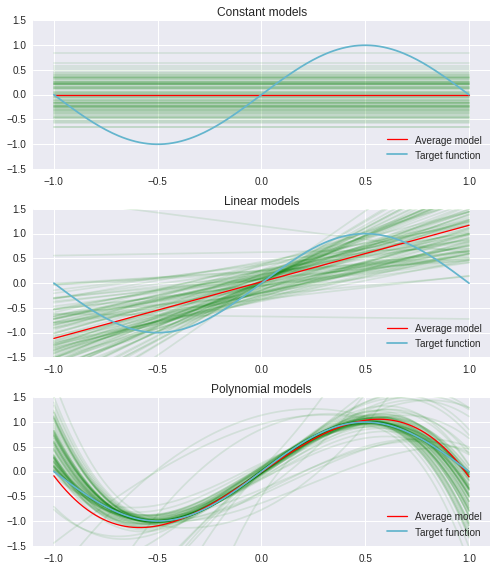

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
try: import seaborn as sns
except ImportError: pass

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(7, 8))
axes[0].set_title('Constant models')
axes[1].set_title('Linear models')
axes[2].set_title('Polynomial models')

# Plot all the fitted models
for dataset in range(n_datasets):
    constant = constant_models[dataset].flatten()
    axes[0].plot((-1, 1), (constant, constant), c='g', alpha=0.1)
    
    weights = linear_models[dataset]
    axes[1].plot((-1, 1), (weights[0] - weights[1], weights[0] + weights[1]),
                 c='g', alpha=0.1)
    y_poly = eval_polynomial(X_eval, polynomial_models[dataset])
    if y_poly is not None:
        axes[2].plot(X_eval, y_poly, c='g', alpha=0.1)
    
# Plot the average models
if average_linear_model is not None:
    axes[1].plot((-1, 1), 
        (average_linear_model[0] - average_linear_model[1],
        average_linear_model[0] + average_linear_model[1]),
        c='r', lw=1.3, label='Average model')
if average_constant_model is not None:
    axes[0].plot((-1, 1), 
        (average_constant_model.flatten(), average_constant_model.flatten()),
        c='r', lw=1.3, label='Average model')
if average_polynomial_model is not None:
    axes[2].plot(X_eval, eval_polynomial(X_eval, average_polynomial_model), 
        c='r', lw=1.3, label='Average model')

for a in axes:
    a.plot(X_eval, target(X_eval), label='Target function')
    a.set_xlim((-1.1, 1.1))
    a.set_ylim((-1.5, 1.5))
    a.legend(loc='lower right')
    
fig.tight_layout()